1. Define the Task (currently only superresolution is available, other tasks are coming soon)



In [4]:
# make sure you are in root folder
%cd ..

C:\Users\DaPC\PycharmProjects\ldm1


In [6]:
import ipywidgets as widgets
from IPython.display import display
from omegaconf import OmegaConf
from ldm.util import instantiate_from_config
import torch

def load_model_from_config(config, ckpt):
    print(f"Loading model from {ckpt}")
    pl_sd = torch.load(ckpt, map_location="cpu")
    global_step = pl_sd["global_step"]
    sd = pl_sd["state_dict"]
    model = instantiate_from_config(config.model)
    m, u = model.load_state_dict(sd, strict=False)
    model.cuda()
    model.eval()
    return {"model": model}, global_step


mode = widgets.Select(options=['superresolution'],
    value='superresolution', description='Task:')
display(mode)

Select(description='Task:', options=('superresolution',), value='superresolution')

3. Load model checkpoint


In [8]:
from notebook_helpers import get_model
# model = get_model(mode.value)

config = OmegaConf.load("models/ldm/bsr_sr/config.yaml")
model, step = load_model_from_config(config, "models/ldm/bsr_sr/model.ckpt")

Loading model from models/ldm/bsr_sr/model.ckpt
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 113.62 M params.
Keeping EMAs of 308.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels


4. Optional step: Put your own conditioning image for superresolution in inputs/superres folder (height and width should be 256 px)

In [5]:
from notebook_helpers import get_custom_cond
get_custom_cond(mode.value)

4. Select conditioning from available examples or the uploaded custom conditioning

In [9]:
from notebook_helpers import get_cond_options, get_cond
dir, options = get_cond_options(mode.value)
cond_choice = widgets.RadioButtons(
        options=options,
        description='Select conditioning:',
        disabled=False
    )
display(cond_choice)

RadioButtons(description='Select conditioning:', options=('custom_00001.png', 'custom_custom_00001.png', 'cust…

5. Run Model

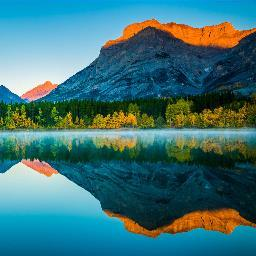

Plotting: Switched to EMA weights
Sampling with eta = 1.0; steps: 100
Data shape for DDIM sampling is (1, 3, 256, 256), eta 1.0
Running DDIM Sampling with 100 timesteps


DDIM Sampler: 100%|██████████| 100/100 [00:41<00:00,  2.43it/s]


Plotting: Restored training weights


In [14]:
from notebook_helpers import run
import os
custom_steps = 100
cond_choice_path = os.path.join(dir, cond_choice.value)
logs = run(model["model"], cond_choice_path, mode.value, custom_steps)

6. Display Sample

(1, 1024, 1024, 3)


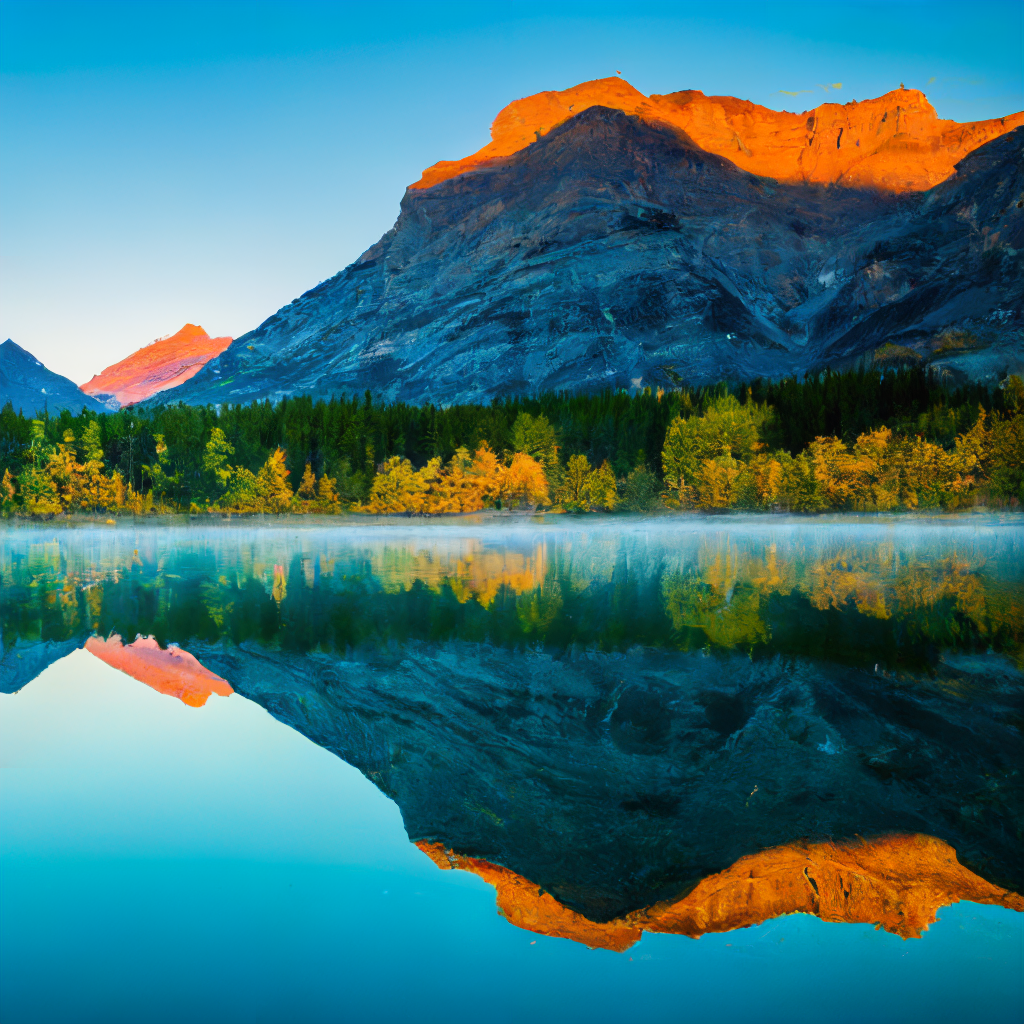

In [15]:
import torch
import numpy as np
import IPython.display as d
from PIL import Image

sample = logs["sample"]
sample = sample.detach().cpu()
sample = torch.clamp(sample, -1., 1.)
sample = (sample + 1.) / 2. * 255
sample = sample.numpy().astype(np.uint8)
sample = np.transpose(sample, (0, 2, 3, 1))
print(sample.shape)
a = Image.fromarray(sample[0])
display(a)
